In [2]:
#%pip install tsfresh
#%pip install dfply



In [4]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:

work_dir = '/home/idies/workspace/Storage/hnguye78/persistent/CARDIA_longi_project'
data_file_name = 'data_longi_long_up_to_y15_prior_model_training'
load_dir = work_dir+ '/csv_files'

# load data:
data = pd.read_csv(load_dir+'/'+data_file_name+'.csv')
data = data.select_dtypes(include =[np.number])

In [6]:
print(data.head())


   Unnamed: 0            ID  event  exam_year       time  AGE_Y0  MALE  \
0           1  100016012504      0          0  32.375086      22     1   
1           2  100016012504      0          2  32.375086      22     1   
2           3  100016012504      0          5  32.375086      22     1   
3           4  100023004268      0          0  32.361396      30     1   
4           5  100023004268      0          2  32.361396      30     1   

   RACEBLACK  CHOL  DIAB  HBM  HDL    SBP  SMKNW  
0          0   161     0    0   40  126.0      1  
1          0   151     0    0   46  103.0      1  
2          0   186     0    0   38  114.0      1  
3          0   198     0    0   59  108.0      0  
4          0   179     0    0   57   97.0      0  


In [7]:
data_ts = data.loc[:, ~data.columns.isin(['Unnamed: 0', 'event','time'])]
# data_ts.rename(columns={"exam_year": "time"}


In [8]:
print(data_ts.head())


             ID  exam_year  AGE_Y0  MALE  RACEBLACK  CHOL  DIAB  HBM  HDL  \
0  100016012504          0      22     1          0   161     0    0   40   
1  100016012504          2      22     1          0   151     0    0   46   
2  100016012504          5      22     1          0   186     0    0   38   
3  100023004268          0      30     1          0   198     0    0   59   
4  100023004268          2      30     1          0   179     0    0   57   

     SBP  SMKNW  
0  126.0      1  
1  103.0      1  
2  114.0      1  
3  108.0      0  
4   97.0      0  


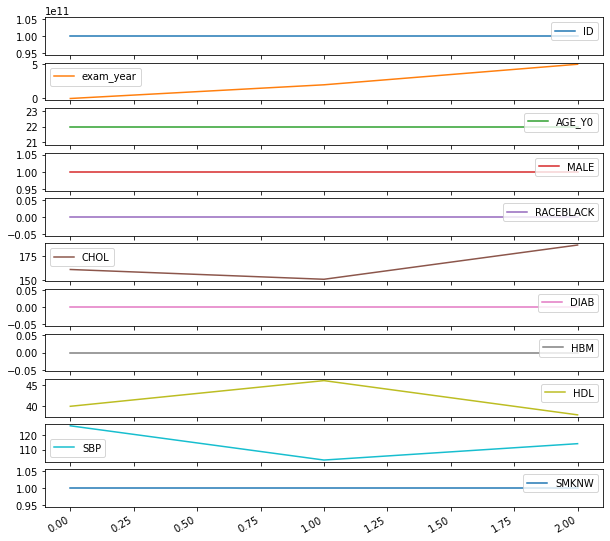

In [9]:
data_ts[data_ts['ID'] == 100016012504].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [10]:
from tsfresh import extract_features
extracted_features = extract_features(data_ts, column_id="ID", column_sort="exam_year")

Feature Extraction: 100%|██████████| 50/50 [02:32<00:00,  3.05s/it]


In [30]:
y_ts = data.drop_duplicates(subset=['ID'], keep='first') 
y_ts = y_ts[['ID', 'event']]
y_ts = y_ts.set_index('ID')#.reset_index(drop=True)
y_ts = y_ts.squeeze()
y_ts

ID
100016012504    0
100023004268    0
100033323702    0
100056526386    0
100061300991    0
               ..
416761219907    0
416771521620    0
416783315386    0
416796224310    0
416817227898    0
Name: event, Length: 4943, dtype: int64

In [20]:
extracted_features.iloc[:10,:10]

,AGE_Y0__variance_larger_than_standard_deviation,AGE_Y0__has_duplicate_max,AGE_Y0__has_duplicate_min,AGE_Y0__has_duplicate,AGE_Y0__sum_values,AGE_Y0__abs_energy,AGE_Y0__mean_abs_change,AGE_Y0__mean_change,AGE_Y0__mean_second_derivative_central,AGE_Y0__median
100016012504,0.0,1.0,1.0,1.0,66.0,1452.0,0.0,0.0,0.0,22.0
100023004268,0.0,1.0,1.0,1.0,150.0,4500.0,0.0,0.0,0.0,30.0
100033323702,0.0,1.0,1.0,1.0,110.0,2420.0,0.0,0.0,0.0,22.0
100056526386,0.0,1.0,1.0,1.0,168.0,4704.0,0.0,0.0,0.0,28.0
100061300991,0.0,1.0,1.0,1.0,120.0,2400.0,0.0,0.0,0.0,20.0
100080112533,0.0,1.0,1.0,1.0,120.0,2400.0,0.0,0.0,0.0,20.0
100099617838,0.0,0.0,0.0,0.0,26.0,676.0,0.0,0.0,0.0,26.0
100101126081,0.0,1.0,1.0,1.0,168.0,4704.0,0.0,0.0,0.0,28.0
100111426133,0.0,1.0,1.0,1.0,38.0,722.0,0.0,0.0,0.0,19.0
100137209787,0.0,1.0,1.0,1.0,114.0,2166.0,0.0,0.0,0.0,19.0


In [31]:
# from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y_ts)


In [33]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(data_ts, y_ts,
                                                     column_id='ID', column_sort='exam_year')

Feature Extraction: 100%|██████████| 50/50 [02:27<00:00,  2.95s/it]


In [34]:
features_filtered_direct.iloc[:10,:10]

,SBP__quantile__q_0.9,SBP__quantile__q_0.8,SBP__maximum,SBP__quantile__q_0.7,HBM__energy_ratio_by_chunks__num_segments_10__segment_focus_0,SBP__root_mean_square,"HBM__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20)","HBM__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)","HBM__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)",SBP__mean
100016012504,123.6,121.2,126.0,118.8,1.0,114.718496,0.000000,0.000000,0.000000,114.333333
100023004268,106.0,104.0,108.0,102.4,1.0,100.516665,0.000000,0.000000,0.000000,100.400000
100033323702,116.6,116.2,117.0,115.8,1.0,112.110660,0.000000,0.000000,0.000000,112.000000
100056526386,142.0,129.0,155.0,126.5,1.0,127.132477,0.000000,0.000000,0.000000,126.333333
100061300991,139.5,120.0,159.0,117.5,1.0,121.207123,0.000000,0.000000,0.000000,119.833333
100080112533,117.5,114.0,121.0,114.0,1.0,111.924081,0.000000,0.000000,0.000000,111.666667
100099617838,133.0,133.0,133.0,133.0,1.0,133.000000,0.000000,0.000000,0.000000,133.000000
100101126081,113.5,112.0,115.0,112.0,1.0,108.764271,0.000000,0.000000,0.000000,108.666667
100111426133,155.3,151.6,159.0,147.9,0.0,141.712738,0.000000,0.000000,0.000000,140.500000
100137209787,109.5,109.0,110.0,108.0,0.0,105.876500,0.265102,0.192307,0.337439,105.833333


In [35]:
features_filtered_direct.to_csv(load_dir+'/fsfresh_features_filtered.csv')